## Event Summary Visualizations

In [1]:
from IPython.core.display import HTML

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 600
# font = {'family' : 'serif',
#         'weight' : 'normal',
#         'size'   : 18}
# matplotlib.rc('font', **font)
# plt.rcParams["font.family"] = "Times New Roman"

import h5py
import pandas as pd
import numpy as np
import scipy as sp
import glob
import sys
import os

import paper_utils as paperu

/home/satsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import config_paper as config

hemisphere = config.constants['HEMISPHERES']
patient_ids = config.constants['PATIENT_IDS_PAPER']
decoder_days = config.constants['ECOG_DAYS_PAPER']
DATA_DIR = config.constants['DATA_DIR']
print('patient_ids', patient_ids)
LIMBS = ['r_wrist', 'l_wrist']

patient_ids ['a0f66459', 'c95c1e82', 'cb46fd46', 'fcb01f7a', 'ffb52f92', 'b4ac1726', 'f3b79359', 'ec761078', 'f0bbc9a9', 'abdb496b', 'ec168864', 'b45e3f7b']


### Load events

In [3]:
total_events = 0
multiple_patient_events = []
for patient_id in patient_ids:
    for limb in LIMBS:
        events_df = paperu.load_events_for_patient_id(patient_id, limb, rest=True)
        events_df = events_df.query("mvmt != 'mv_0'")
        print(patient_id, limb, events_df.shape)
#         print(events_df.groupby(['day', 'mvmt']).count()['time'])
        multiple_patient_events.append( events_df )
        total_events += events_df.shape[0]
print("All together {} events found".format(total_events))

a0f66459 r_wrist (1513, 42)
a0f66459 l_wrist (1698, 42)
c95c1e82 r_wrist (1109, 42)
c95c1e82 l_wrist (875, 42)
cb46fd46 r_wrist (2063, 42)
cb46fd46 l_wrist (2075, 42)
fcb01f7a r_wrist (3337, 42)
fcb01f7a l_wrist (1379, 42)
ffb52f92 r_wrist (940, 42)
ffb52f92 l_wrist (735, 42)
b4ac1726 r_wrist (3407, 42)
b4ac1726 l_wrist (3338, 42)
f3b79359 r_wrist (2741, 42)
f3b79359 l_wrist (1446, 42)
ec761078 r_wrist (3526, 42)
ec761078 l_wrist (2607, 42)
f0bbc9a9 r_wrist (475, 42)
f0bbc9a9 l_wrist (484, 42)
abdb496b r_wrist (1501, 42)
abdb496b l_wrist (1626, 42)
ec168864 r_wrist (2403, 42)
ec168864 l_wrist (2269, 42)
b45e3f7b r_wrist (2684, 42)
b45e3f7b l_wrist (2307, 42)
All together 46538 events found


## Data analysis over multiple patients

In [4]:
events_df_multiple = pd.concat(multiple_patient_events)
events_df_multiple['subject_id'].unique()

array(['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09',
       'S10', 'S11', 'S12'], dtype=object)

In [5]:
# Days Correction for S04 -- move eveything by 2 days 
events_df_multiple.loc[ events_df_multiple["subject_id"] == 'S04', 'day'] -= 2 

In [6]:
# Column names
# events_df_multiple.columns

In [7]:
# How many per day: avg +/- std
for limb in LIMBS:
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    tabulated = limb_df.groupby(by=['subject_id', 'day'])[
        'event_timestamp'].count().unstack()
    print(limb)
    print( tabulated.T.mean(axis=0).describe() )
    display(tabulated)

r_wrist
count     12.000000
mean     268.203538
std      123.238319
min       59.375000
25%      165.690476
50%      297.544643
75%      349.663194
max      440.750000
dtype: float64


day,1,2,3,4,5,6,7,8,9
subject_id,,,,,,,,,
S01,43.0,181.0,276.0,216.0,246.0,34.0,340.0,152.0,25.0
S02,45.0,84.0,112.0,248.0,226.0,273.0,121.0,NaN,NaN
S03,25.0,471.0,657.0,429.0,189.0,231.0,61.0,NaN,NaN
S04,106.0,353.0,238.0,256.0,623.0,443.0,561.0,670.0,87.0
S05,58.0,31.0,167.0,158.0,24.0,NaN,476.0,26.0,NaN
S06,101.0,429.0,472.0,686.0,746.0,425.0,469.0,79.0,NaN
S07,11.0,93.0,218.0,260.0,554.0,709.0,830.0,66.0,NaN
S08,62.0,566.0,934.0,702.0,251.0,570.0,389.0,52.0,NaN
S09,14.0,15.0,58.0,90.0,182.0,59.0,52.0,5.0,NaN


l_wrist
count     12.000000
mean     218.995205
std      104.281958
min       60.500000
25%      146.166667
50%      195.958333
75%      290.388393
max      417.250000
dtype: float64


day,1,2,3,4,5,6,7,8,9
subject_id,,,,,,,,,
S01,27.0,177.0,240.0,304.0,336.0,32.0,366.0,179.0,37.0
S02,13.0,74.0,100.0,197.0,171.0,209.0,111.0,NaN,NaN
S03,14.0,402.0,659.0,442.0,286.0,230.0,42.0,NaN,NaN
S04,53.0,149.0,117.0,116.0,304.0,152.0,188.0,261.0,39.0
S05,57.0,31.0,139.0,125.0,11.0,NaN,351.0,21.0,NaN
S06,117.0,450.0,445.0,565.0,676.0,460.0,547.0,78.0,NaN
S07,17.0,36.0,112.0,152.0,294.0,360.0,379.0,96.0,NaN
S08,36.0,327.0,488.0,613.0,228.0,506.0,362.0,47.0,NaN
S09,6.0,5.0,58.0,59.0,228.0,82.0,37.0,9.0,NaN


In [8]:
# Totals - split by limb 
for limb in LIMBS:
    print(limb)
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    tabulated = limb_df.groupby(by=['subject_id', 'day'])[
        'event_timestamp'].count().unstack().fillna(0).astype(int)
    print(tabulated.T.sum(axis=0).describe()) # Across patients
    display( tabulated.T.sum(axis=0) ) # Per patient

r_wrist
count      12.000000
mean     2141.583333
std      1034.317294
min       475.000000
25%      1403.000000
50%      2233.000000
75%      2890.000000
max      3526.000000
dtype: float64


subject_id
S01    1513
S02    1109
S03    2063
S04    3337
S05     940
S06    3407
S07    2741
S08    3526
S09     475
S10    1501
S11    2403
S12    2684
dtype: int64

l_wrist
count      12.000000
mean     1736.583333
std       830.444072
min       484.000000
25%      1253.000000
50%      1662.000000
75%      2278.500000
max      3338.000000
dtype: float64


subject_id
S01    1698
S02     875
S03    2075
S04    1379
S05     735
S06    3338
S07    1446
S08    2607
S09     484
S10    1626
S11    2269
S12    2307
dtype: int64

In [9]:
# Totals: Both limbs together -- daily counts
limb_df = events_df_multiple.query('mvmt != "mv_0"'.format(limb))
tabulated = limb_df.groupby(by=['subject_id', 'day'])[
    'event_timestamp'].count().unstack()
print( tabulated.T.mean(axis=0).describe() )
display(tabulated)

count     12.000000
mean     487.198743
std      215.423183
min      119.875000
25%      338.440476
50%      523.687500
75%      599.325893
max      843.125000
dtype: float64


day,1,2,3,4,5,6,7,8,9
subject_id,,,,,,,,,
S01,70.0,358.0,516.0,520.0,582.0,66.0,706.0,331.0,62.0
S02,58.0,158.0,212.0,445.0,397.0,482.0,232.0,NaN,NaN
S03,39.0,873.0,1316.0,871.0,475.0,461.0,103.0,NaN,NaN
S04,159.0,502.0,355.0,372.0,927.0,595.0,749.0,931.0,126.0
S05,115.0,62.0,306.0,283.0,35.0,NaN,827.0,47.0,NaN
S06,218.0,879.0,917.0,1251.0,1422.0,885.0,1016.0,157.0,NaN
S07,28.0,129.0,330.0,412.0,848.0,1069.0,1209.0,162.0,NaN
S08,98.0,893.0,1422.0,1315.0,479.0,1076.0,751.0,99.0,NaN
S09,20.0,20.0,116.0,149.0,410.0,141.0,89.0,14.0,NaN


In [10]:
# Totals:  Both limbs together -- total counts
limb_df = events_df_multiple.query('mvmt != "mv_0"'.format(limb))
tabulated = limb_df.groupby(by=['subject_id', 'day'])[
    'event_timestamp'].count().unstack().fillna(0).astype(int)
print(tabulated.T.sum(axis=0).describe())
display( tabulated.T.sum(axis=0) )

count      12.000000
mean     3878.166667
std      1758.334431
min       959.000000
25%      2841.250000
50%      4162.500000
75%      4784.750000
max      6745.000000
dtype: float64


subject_id
S01    3211
S02    1984
S03    4138
S04    4716
S05    1675
S06    6745
S07    4187
S08    6133
S09     959
S10    3127
S11    4672
S12    4991
dtype: int64

## Manuscript-ready plots

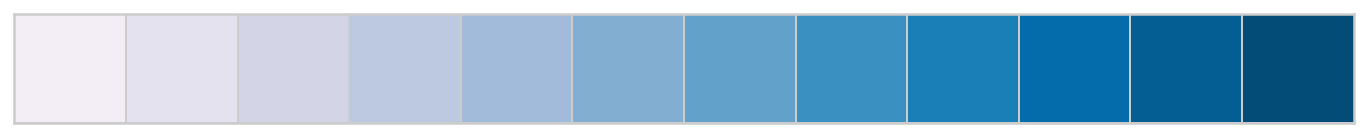

In [11]:
sns.palplot(sns.color_palette("PuBu", 12))
plt.show()
mycolors = sns.color_palette("PuBu", 12)
# mycolors
# sns.heatmap(np.matrix(np.arange(11)), cmap=mycolors, cbar=False)

## Figure -- Plot number of events by subject by day

In [12]:
def plot_events_per_subject_day(limb_df, figsize=(5.50,2.75)):
    sns.set_style("whitegrid")
    ax = limb_df.groupby(by=['subject_id', 'day'])[
        'event_timestamp'].count().unstack().fillna(0).astype(int).plot(
        kind='bar', stacked='True', legend=False, figsize=figsize, color=mycolors)
    plt.ylabel('Number of events')
    plt.xlabel('Subject ID')
    plt.ylim(0, 3600)
    plt.tight_layout()
    plt.show()

r_wrist


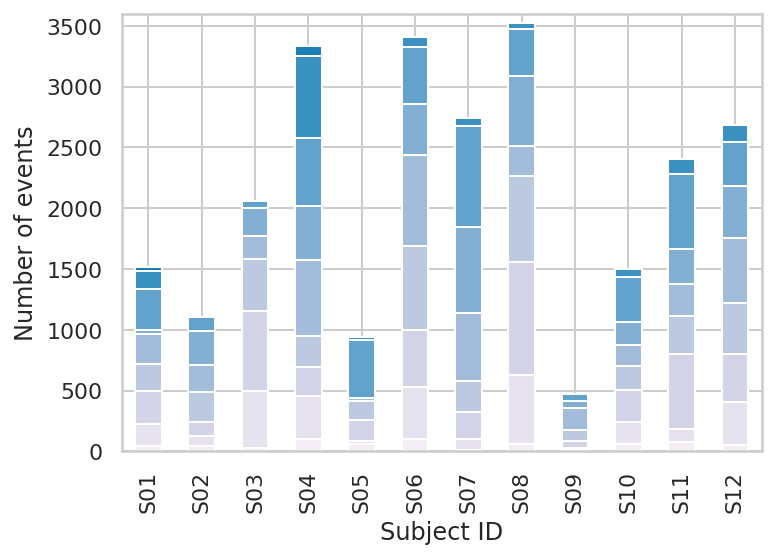

l_wrist


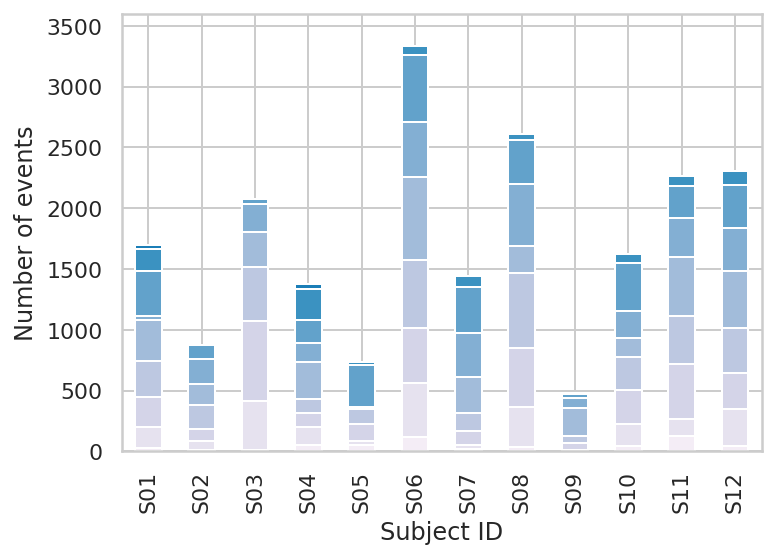

In [13]:
# Number of events per patient (colored by day)
for limb in LIMBS:
    print(limb)
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    plot_events_per_subject_day(limb_df, figsize=(5.50,4))
#     plot_events_per_subject_day_colorbar(limb_df)
    

## Figure -- Plot event times

r_wrist


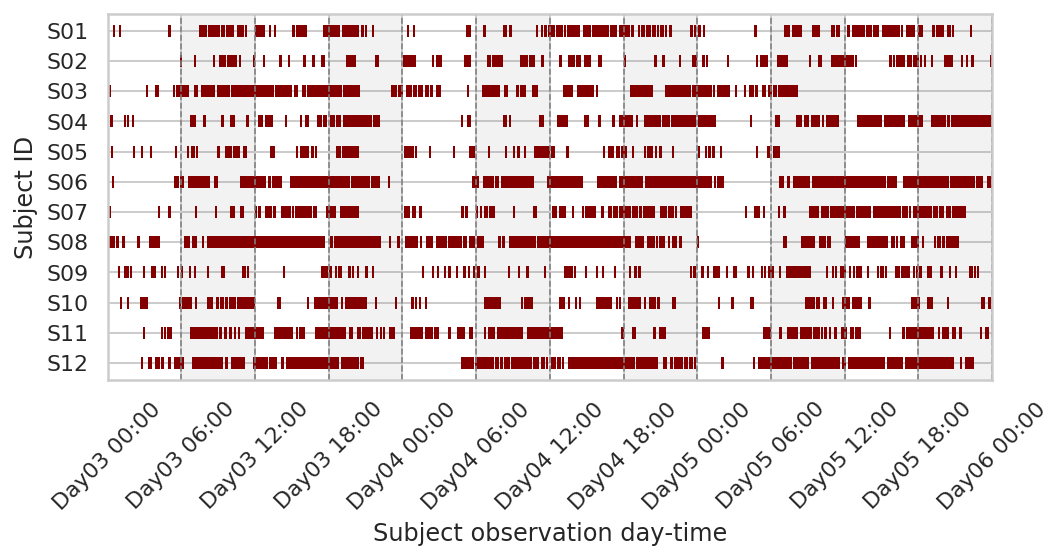

l_wrist


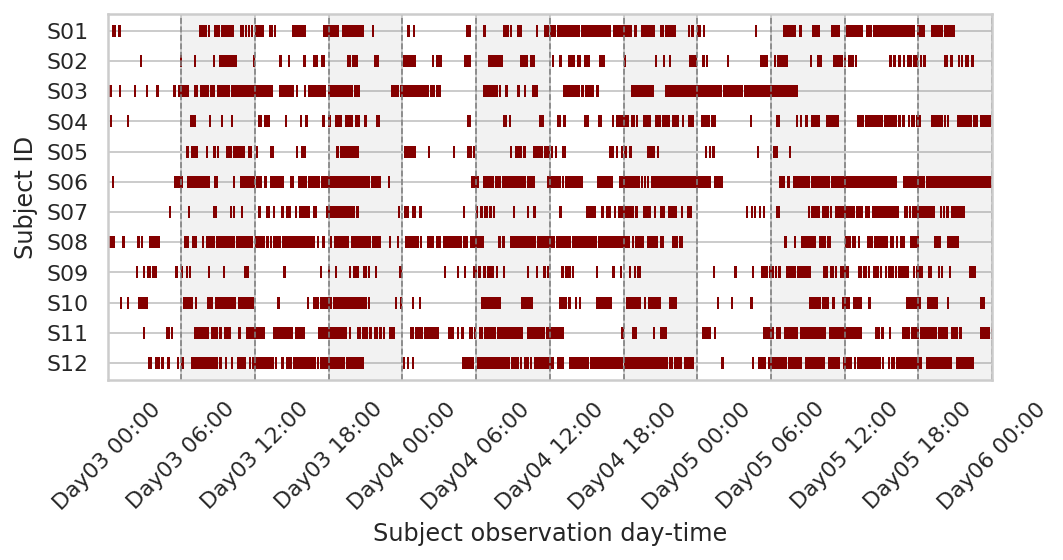

In [14]:
def plot_event_times(limb_df):
    mvti = limb_df.query("mvmt != 'mv_0'")
    mvti['time'] = pd.to_timedelta(mvti['event_timestamp'])
    # mvti['time']
    title = None # 'r_wrist_1 events'

    tdf = mvti.loc[:, ['time', 'subject_id']]
    tdf['time'] += pd.to_timedelta(mvti['day'], unit='d')
    tdf['dt'] = pd.to_datetime('2014-12-31') + tdf['time'] 

    # Plot
    fig, ax = plt.subplots(figsize=(7.5,4)) # 1.5 column
#     fig, ax = plt.subplots(figsize=(5,4)) # 1 column
    ax.plot(tdf['dt'], tdf['subject_id'], marker='|', lw=0, c=sns.xkcd_rgb["dark red"]);
    ax.invert_yaxis()
    plt.ylabel('Subject ID')
    plt.xlabel('Subject observation day-time')
    if title is not None:
      plt.title(title)

    # Set grid/ticks
    # TODO: Get date-range from data
    # gridticks = pd.date_range(pd.to_datetime('2015-01-01'), pd.to_datetime('2015-01-12'), freq='6H')
    gridticks = pd.date_range(pd.to_datetime('2015-01-01'), pd.to_datetime('2015-01-12'), freq='6H')

    # for gtick in gridticks:
    for idx in range(len(gridticks)):
        gtick = gridticks[idx]
        ax.axvline(gtick, linestyle='--', lw=0.8, color='grey')
        if idx > 0 and idx % 2 == 0:
            ax.axvspan(gridticks[idx-1], gridticks[idx], facecolor='grey', alpha=0.1)
    ax.set_xticks(gridticks)
    ax.set_xticklabels(gridticks, rotation='45')

    from matplotlib.dates import DateFormatter
    myFmt = DateFormatter("Day%d %H:%M")
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_xlim(pd.to_datetime('2015-01-03'), pd.to_datetime('2015-01-06')) # 3 day
#     ax.set_xlim(pd.to_datetime('2015-01-03'), pd.to_datetime('2015-01-05')) # 2 day
    plt.tight_layout()
#     plt.rcParams["axes.edgecolor"] = "0.25"
    plt.show()
    
for limb in LIMBS:
    print(limb)
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    plot_event_times(limb_df)

## Event metadata / variability 

In [15]:
# Continous variables per patient
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

def plot_metadata_plots(limb_df):
    metadata_plots = [
        'reach_r', 
        'offset_velocity', 
        'onset_velocity', 
        'reach_duration', 
        'reach_r', 
        'run_01', 
        'run_1', 
        'run_10',
        'run_1_trimmed_velocity', 
        'run_1_wconf',]
    sns.set_style("whitegrid")

    metadata_plots_dict = {
    #     'reach_r': { 'xlim':(0,250) }, 
    #     'reach_duration': { 'xlim':(0,120) }, 
        'Reach magnitude [px]': { 'xlim':(0,250) }, 
        'Reach duration [frames]': { 'xlim':(0,90) }, 
        'Bimanual lead-lag': { 'xlim':(-15, 15) }, 
        'Bimanual overlap15': { 'xlim':(0, 30) }, 
        'Bimanual overlap30': { 'xlim':(0, 60) }, 
    #     'reach_r': { 'xlim':(0,400) }, 
    }

    colnames = list(metadata_plots_dict.keys())
    for colname in colnames:
        g = sns.FacetGrid(limb_df, 
                      row="subject_id",
                      height=0.6, 
                      aspect=4, 
    #                   margin_titles=True,
                      xlim=metadata_plots_dict[colname]['xlim'],
                     )
        g.map(sns.distplot, 
              colname, 
              hist=True, 
              rug=False, 
             );
        axes = g.axes.flatten()
        for idx in range(len(axes)):
    #         print(idx)
            ax = axes[idx]
            ax.set_title("") 
            ax.grid(False)
            if colname == colnames[1]: # Reach duration
                ax.axvline(x=30, ls='--', c='grey', alpha=0.7)
                ax.axvline(x=60, ls='--', c='grey', alpha=0.7)
            if colname == colnames[2]: # Lead-lag
                ax.axvline(x=0, ls='--', c='grey', alpha=0.7)
            if idx == 0: 
                ax.set_yticklabels([0.0, 0.02])
            else:
                ax.set_yticklabels([])        
        g.fig.subplots_adjust(wspace=.02, hspace=.02);
        plt.show()

r_wrist


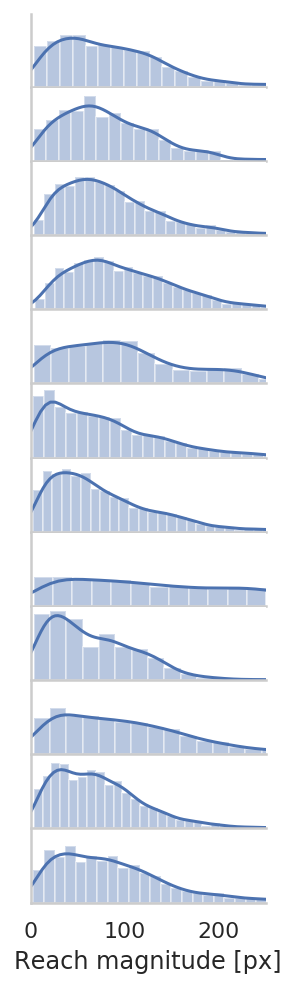

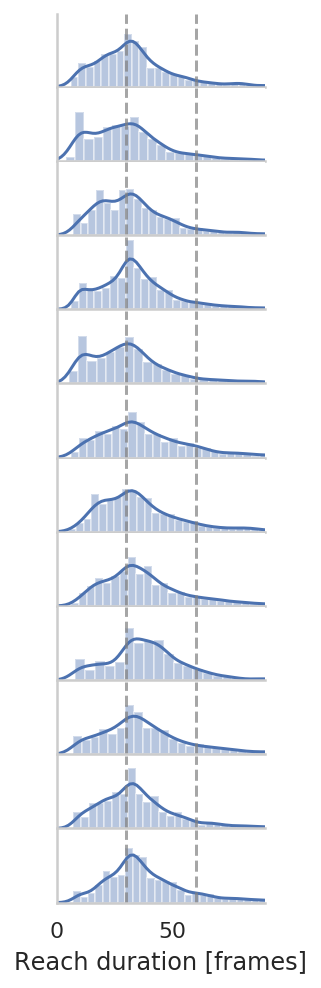

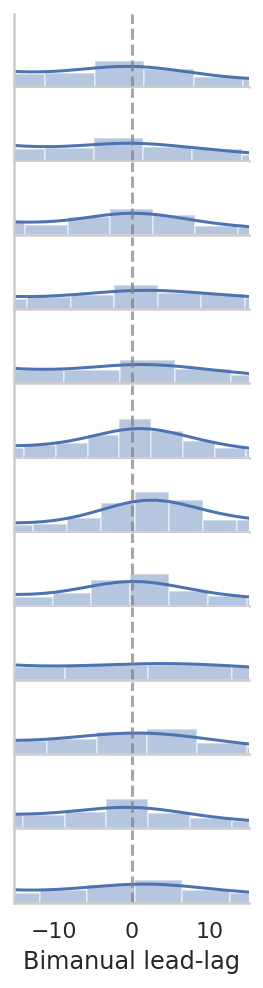

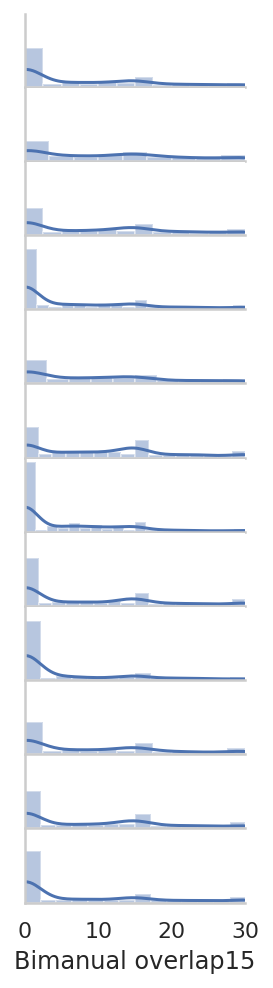

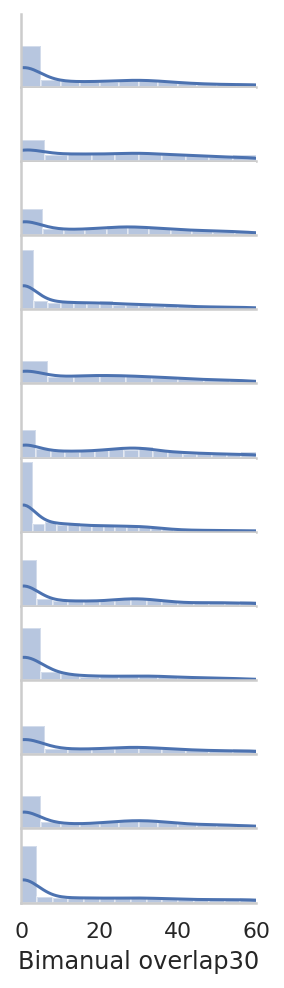

l_wrist


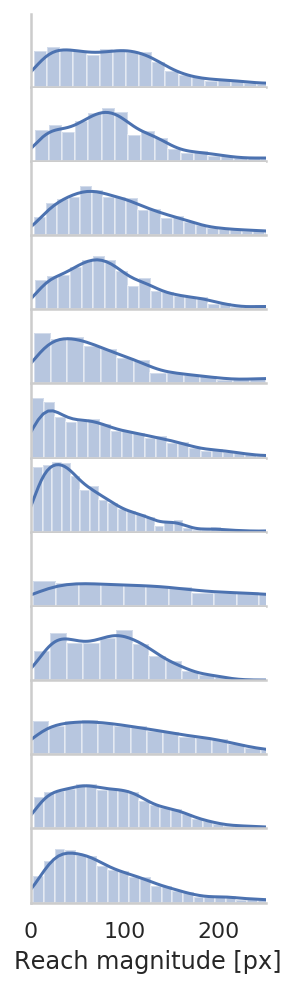

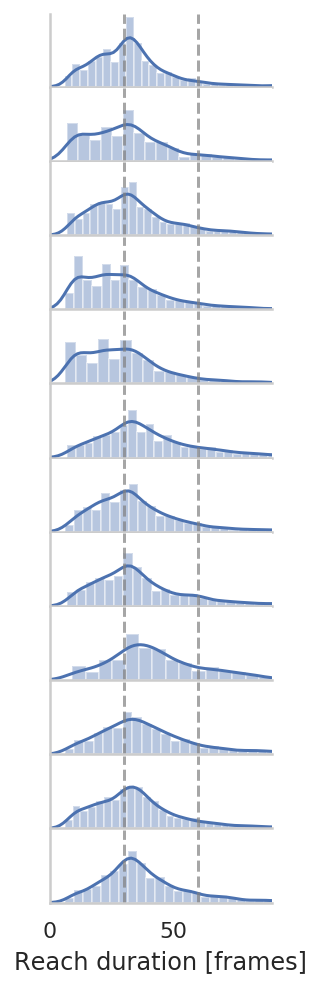

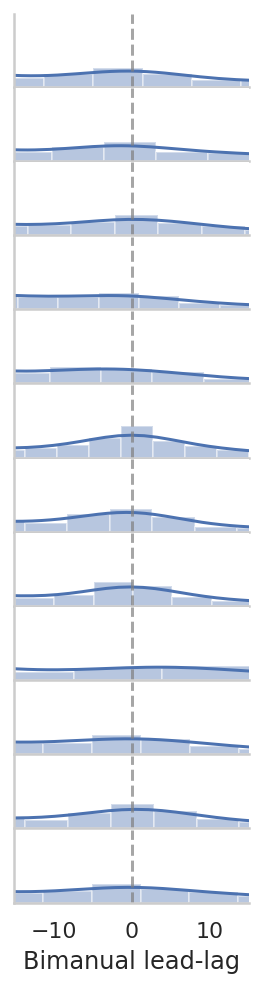

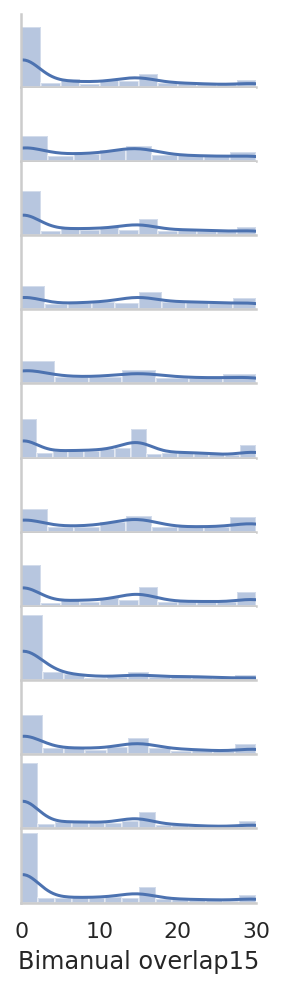

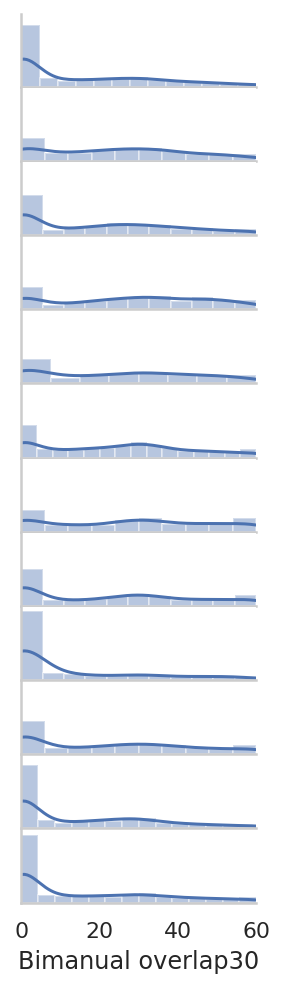

In [16]:
events_df_multiple['Reach magnitude [px]'] = events_df_multiple['reach_r']
events_df_multiple['Reach duration [frames]'] = events_df_multiple['reach_duration']
events_df_multiple['Bimanual lead-lag'] = events_df_multiple['other_lead_lag']
events_df_multiple['Bimanual overlap15'] = events_df_multiple['other_overlap_15pm']
events_df_multiple['Bimanual overlap30'] = events_df_multiple['other_overlap_30pm']

for limb in LIMBS:
    print(limb)
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    plot_metadata_plots(limb_df)




## Polar plots: reach_angles

In [82]:

# Grid of polar plots
def plot_polar_grid_v1(limb_df):
    n_rows = 2
    n_cols = 6
    fig, axes = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(8,5), subplot_kw=dict(polar=True))
    subject_ids = limb_df['subject_id'].unique()
    info_df = []
    for idx in range(len(subject_ids)):
        idx_x = idx // n_cols
        idx_y = idx % n_cols
        s_id = subject_ids[idx]
#         print(idx, idx_x, idx_y, s_id) # Plot subplot information
        ax = axes[idx_x, idx_y]

        events_subset = limb_df.query('subject_id == "{}"'.format( s_id ))
        degrees = events_subset['reach_a'] + 180
#         print(s_id, "Mode:", sp.stats.mode(degrees.astype(int)))
        radians = np.deg2rad(degrees)
        bin_size = 20
        a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
        centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
        
        # Quantitative metric for polar plots
        mode_idx = np.argmax(a) 
        mode_bin = b[mode_idx] 
        mode_center = np.rad2deg(centers[mode_idx])
#         print(s_id, '\n', a, '\n', b, '\n')
#         print(s_id, mode_idx, mode_bin, mode_center)
        info_df.append({
                "SubjectID": s_id, 
#                 "mode_idx": mode_idx, 
#                 "mode_bin": mode_bin, 
                "mode_center": mode_center, 
                       })
        
        ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='lightblue', edgecolor='k')
        ax.set_title(s_id, y=1.08)
    #     ax.set_xlabel(s_id)

        ax.yaxis.set_major_locator(plt.NullLocator()) # Get rid of magnitudes    
        ax.set_xticklabels(['']*8) # No angle labels

        if not (idx_x == 0 and idx_y == 0):
            ax.spines['polar'].set_visible(False)
            # https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
            ax.grid(False)
            ax.xaxis.set_major_formatter(plt.NullFormatter()) # Get rid of degrees

    plt.subplots_adjust(wspace=.05, # horizontal space between subplots
                        hspace=-.4 # vertical space between subplots
                       );
    plt.suptitle('Reach angle [degrees]', verticalalignment='bottom')
    plt.tight_layout()
    plt.show()
    
    info_df = pd.DataFrame(info_df)
    print(info_df)
    print("Mean", info_df['mode_center'].mean())
    print("s.d.", info_df['mode_center'].std())

In [83]:
# Polar plots
def plot_polar_grid_v2(limb_df):
    n_rows = 3
    n_cols = 4
    fig, axes = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(15,10), subplot_kw=dict(polar=True))
    subject_ids = limb_df['subject_id'].unique()
    for idx in range(len(subject_ids)):
        idx_x = idx // n_cols
        idx_y = idx % n_cols
        s_id = subject_ids[idx]
        print(idx, idx_x, idx_y, s_id)
        ax = axes[idx_x, idx_y]

        events_subset = limb_df.query('subject_id == "{}"'.format( s_id ))
        degrees = events_subset['reach_a'] + 180
        radians = np.deg2rad(degrees)
        bin_size = 20
        a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
        centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
        ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='lightblue', edgecolor='k')
        ax.set_title(s_id, y=1.08)
    #     ax.set_xlabel(s_id)
        ax.yaxis.set_major_locator(plt.NullLocator()) # Get rid of magnitudes    
        ax.set_xticklabels(['']*8) # No angle labels
        if not (idx_x == 0 and idx_y == 0):
            ax.spines['polar'].set_visible(False)
            # https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
            ax.grid(False)
            ax.xaxis.set_major_formatter(plt.NullFormatter()) # Get rid of degrees
    plt.subplots_adjust(wspace=-.38, # horizontal space between subplots
                        hspace=-.0 # vertical space between subplots
                       );
    # plt.suptitle('Reach angle [degrees]', x=0.5, y=0.0)
    # plt.tight_layout()
    plt.show()
    

In [84]:
# Polar plots -- Gridspec
def plot_polar_grid_v3(limb_df):
    n_rows = 3
    n_cols = 4
    fig, axes = plt.subplots(n_rows, n_cols, sharex=False, sharey=False, figsize=(5,8), subplot_kw=dict(polar=True))
    subject_ids = limb_df['subject_id'].unique()
    for idx in range(len(subject_ids)):
        idx_x = idx // n_cols
        idx_y = idx % n_cols
        s_id = subject_ids[idx]
        print(idx, idx_x, idx_y, s_id)
        ax = axes[idx_x, idx_y]

        events_subset = limb_df.query('subject_id == "{}"'.format( s_id ))
        degrees = events_subset['reach_a'] + 180
        radians = np.deg2rad(degrees)
        bin_size = 20
        a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
        centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
        ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='lightblue', edgecolor='k')
#         ax.set_title(s_id, y=1.08)
#         ax.set_xlabel(s_id)

        ax.yaxis.set_major_locator(plt.NullLocator()) # Get rid of magnitudes    
        ax.set_xticklabels(['']*8) # No angle labels

        if not (idx_x == 0 and idx_y == 0):
            ax.spines['polar'].set_visible(False)
            # https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
            ax.grid(False)
            ax.xaxis.set_major_formatter(plt.NullFormatter()) # Get rid of degrees
    plt.subplots_adjust(wspace=-0.0, # horizontal space between subplots
                        hspace=-0.4 # vertical space between subplots
                       );
    # plt.suptitle('Reach angle [degrees]', x=0.5, y=0.0)
#     plt.tight_layout()
    plt.show()
    

r_wrist


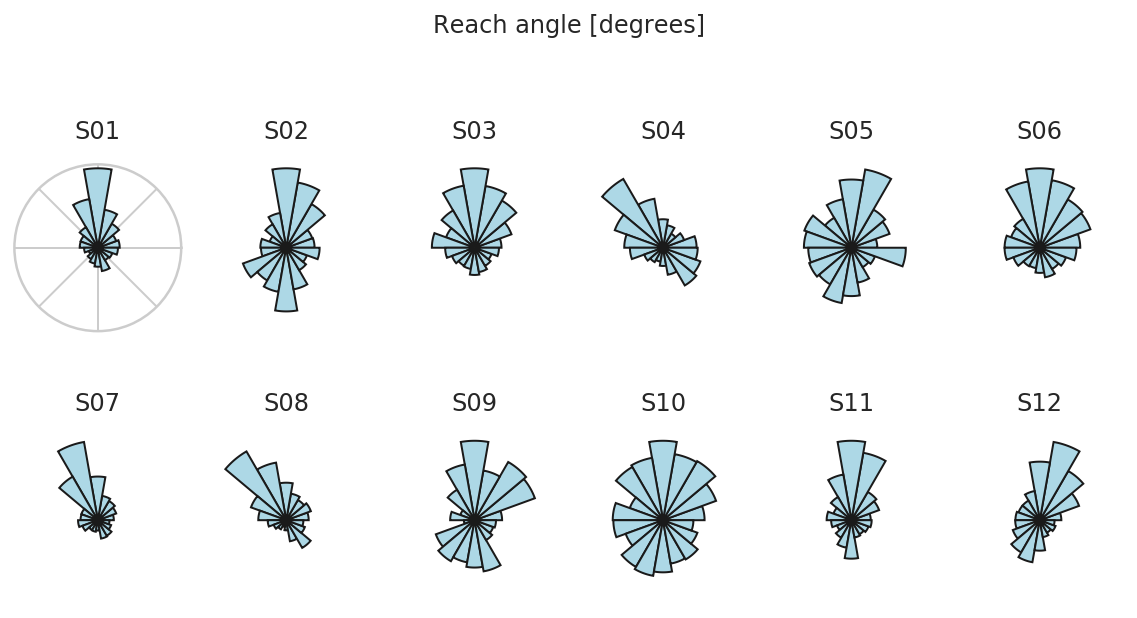

   SubjectID  mode_center
0        S01         90.0
1        S02         90.0
2        S03         90.0
3        S04        130.0
4        S05         70.0
5        S06         90.0
6        S07        110.0
7        S08        130.0
8        S09         90.0
9        S10         90.0
10       S11         90.0
11       S12         70.0
Mean 95.0
s.d. 19.306145983268458
l_wrist


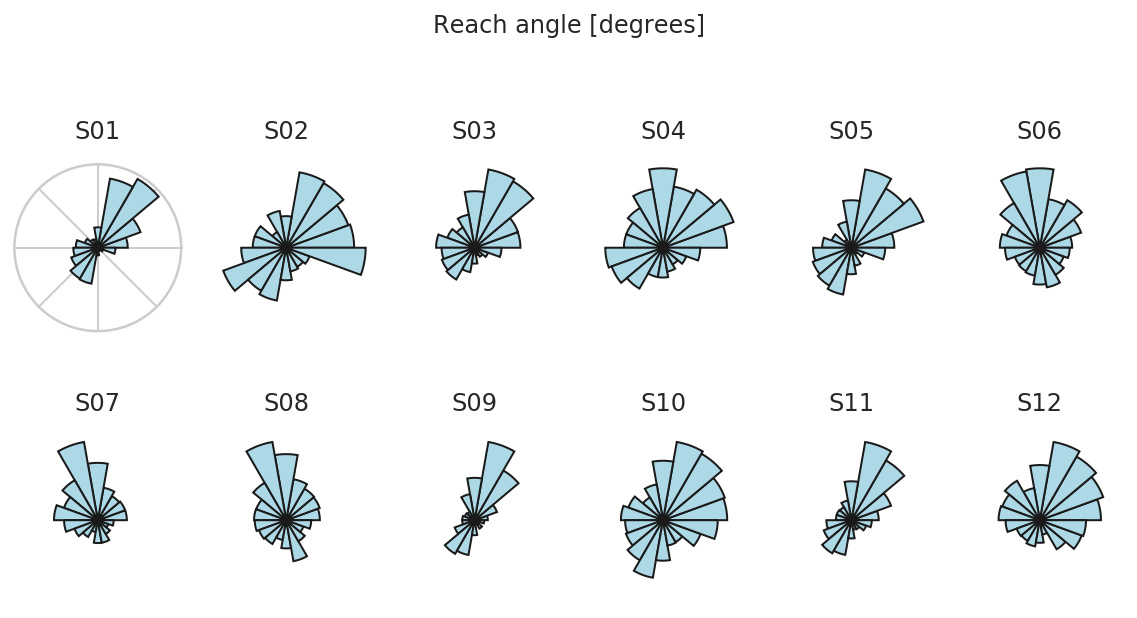

   SubjectID  mode_center
0        S01         50.0
1        S02        350.0
2        S03         70.0
3        S04         90.0
4        S05         70.0
5        S06         90.0
6        S07        110.0
7        S08        110.0
8        S09         70.0
9        S10         70.0
10       S11         70.0
11       S12         70.0
Mean 101.66666666666667
s.d. 80.20806277010642


In [85]:
for limb in LIMBS:
    print(limb)
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    plot_polar_grid_v1(limb_df)
#     plot_polar_grid_v2(limb_df) 
#     plot_polar_grid_v3(limb_df)



## Uni-manual (not bi-manual) events

r_wrist


day,1,2,3,4,5,6,7,8,9
subject_id,,,,,,,,,
S01,36,109,169,94,109,6,219,92,13
S02,39,37,48,101,88,100,43,0,0
S03,15,238,301,166,43,86,28,0,0
S04,50,187,126,161,391,277,354,454,44
S05,25,18,103,82,10,0,169,11,0
S06,34,171,262,259,272,152,182,31,0
S07,5,68,138,161,353,458,528,19,0
S08,38,362,554,303,127,249,200,32,0
S09,7,14,54,82,119,40,19,2,0


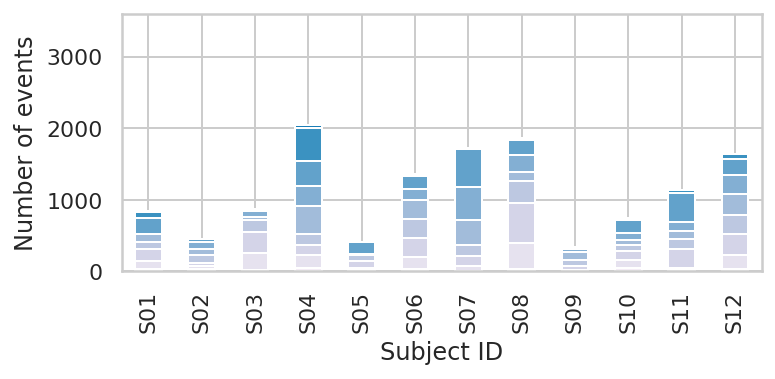

l_wrist


day,1,2,3,4,5,6,7,8,9
subject_id,,,,,,,,,
S01,14,92,98,139,226,18,250,133,18
S02,1,28,38,72,46,74,45,0,0
S03,5,191,281,194,194,62,16,0,0
S04,13,31,51,28,101,46,64,70,14
S05,25,13,55,48,5,0,119,5,0
S06,71,178,138,139,268,165,219,35,0
S07,13,13,28,41,83,116,118,38,0
S08,16,119,205,251,95,182,170,17,0
S09,4,2,48,46,166,59,9,2,0


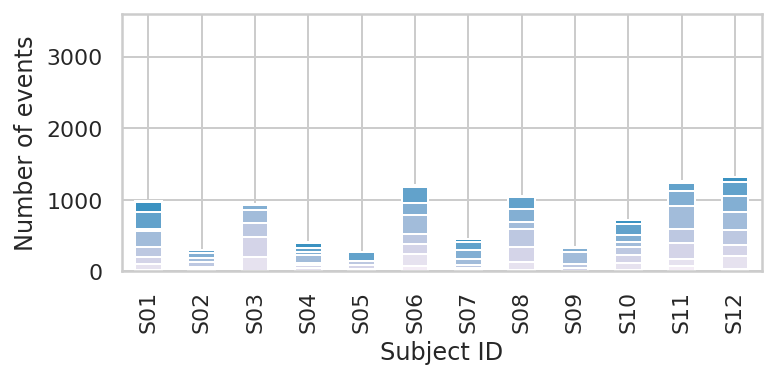

In [21]:
# How bad does bimanual make support?
# events_df_multiple['bimanual'] = (np.abs(events_df_multiple['other_lead_lag']) <= 15) + 0 # No Rest->Move in +/- 0.5s
events_df_multiple['bimanual'] = (events_df_multiple['other_overlap_15pm'] > 6) + 0
events_df_notbimanual = events_df_multiple.query('bimanual == 0')

for limb in LIMBS:
    print(limb)
    limb_df = events_df_notbimanual.query('mvmt == "{}_1"'.format(limb))
    tabulated = limb_df.groupby(by=['subject_id', 'day'])[
        'event_timestamp'].count().unstack()
    display(tabulated.fillna(0).astype(int))
    plot_events_per_subject_day(limb_df)

In [35]:
metadata_plots_dict = {
    'Reach magnitude [px]': { 'xlim':(0,250) }, 
    'Reach duration [frames]': { 'xlim':(0,90) }, 
    'Bimanual lead-lag': { 'xlim':(-15, 15) }, 
    'Bimanual overlap15': { 'xlim':(0, 30) }, 
    'Bimanual overlap30': { 'xlim':(0, 60) }, 
}
colnames = list(metadata_plots_dict.keys()) # Same as for plots

# Quantitative metrics for event metadata
for limb in LIMBS:
    limb_df = events_df_multiple.query('mvmt == "{}_1"'.format(limb))
    
    for col in colnames:
        col_df = limb_df.groupby(by=['subject_id'])[
            col].mean()
        print(limb, col)
        print("Mean", col_df.mean())
        print("s.d.", col_df.std())
        print(col_df)
        print()



r_wrist Reach magnitude [px]
Mean 92.30397311681232
s.d. 22.23801774192976
subject_id
S01     88.096705
S02     83.196181
S03     90.434584
S04    102.590142
S05    103.274440
S06     80.422179
S07     76.538267
S08    151.374347
S09     65.835752
S10    104.530650
S11     73.259169
S12     88.095262
Name: Reach magnitude [px], dtype: float64

r_wrist Reach duration [frames]
Mean 36.87084663404816
s.d. 3.226848934902209
subject_id
S01    34.786517
S02    32.064923
S03    34.206495
S04    34.991310
S05    32.242553
S06    40.744056
S07    37.472820
S08    39.966818
S09    38.955789
S10    40.769487
S11    36.200583
S12    40.048808
Name: Reach duration [frames], dtype: float64

r_wrist Bimanual lead-lag
Mean -6.624075576541002
s.d. 2.733524061710373
subject_id
S01    -8.453863
S02   -10.145577
S03    -9.198347
S04    -5.220273
S05    -9.237624
S06    -5.408441
S07     0.075472
S08    -5.778360
S09    -6.359649
S10    -5.122201
S11    -7.888029
S12    -6.752016
Name: Bimanual lead-lag, d